In [1]:
#----------------Dependencies----------------#

#City and Weather Data:
from citipy import citipy 
import openweathermapy as owm #decided not to use this

#Analysis/Plotting Tools:
import pandas as pd
import matplotlib.pyplot as plt
#cmap reference: https://matplotlib.org/tutorials/colors/colormaps.html

#Mathematical tools:
from random import uniform
import time 
import numpy as np
import datetime

#Query Tools:
from config import api_key #api_key has been disabled, please use your own, thanks!
import requests
import json
from pprint import pprint as pp

#----------------Dependencies----------------#

#### The List of Cities We Want Data For

In [2]:
#Generate a random list of Cities

#intialize empty lists: cities, latitude, longitude

cities = []
#countries = []


#Loop for a certain amount of times
for x in range (1000):
    #set random coordinate values (latitude and longitude)
    lat = np.random.uniform(-90.000, 90.000)
    lon = np.random.uniform(-180.000,180.000)
   
    #Find city closest to the coordinate values: Use Citipy library
    city_obj = citipy.nearest_city(lat,lon)
    
    #Set variables city_name, country_code; to the name of the city and the country code for that city
    city_name = city_obj.city_name
    country_code = city_obj.country_code
    
    #Add the city_name to the cities list only if it's not already in the list
    if city_name not in cities:
        cities.append(city_name)
        #countries.append(country_code) --> became redudant
    
    
#capitalize first letter of each city in cities and uppercase for countries (list comprehensions)

cities = [city.capitalize() for city in cities]
#countries = [country.upper() for country in countries] --> became redudant



#Test print
#print(cities)
#print(countries)


#### Fetching Weather Data from OpenWeatherMap API

In [3]:
#Query variables: url query_url

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" #input your own api key here, replace 'api_key' with your api key

In [4]:
#Test query --> Tested query call to ensure query was working well

#weather_response = requests.get(query_url + "Houston" + "&units=imperial")
#weather_json = weather_response.json()
#pp(weather_json)
#

In [5]:
#Lists to hold values of city names, country names, temperature, humidity, cloudiness, wind speed, dates, times, lat and lon

city_names = []
country_names = []
current_temp = []
humidity = []
cloudy = []
wind_speed = []
dates = []
times = []
latitude = []
longitude = []

In [6]:
#Create counting variable
count = 0

#print initial message
print("Initializing Data Retrieval")
print("-----------------------------")

#Open Weather Map query loop
for city in cities:

  
    #Query via API call and turn it into a JSON format
    weather_response = requests.get(query_url  + city + "&units=imperial")
    weather_json = weather_response.json()
    
    #Condition for Error 404 from weather_response --> For some reason I liked this better than try and except condition
    if weather_json["cod"] == "404":
        print(f"City: {city} was not found, finding next City.")
    #Else get the desired values for lists and append to the lists for each city
    else:
        
        #Get Date and time
        day_time = datetime.datetime.today()
        date = day_time.strftime("%Y-%m-%d")
        time_now = day_time.strftime("%H:%M") + " (hours)"

        #Append to dates and times lists
        dates.append(date)
        times.append(time_now)
         
        #Retrieve desired values: temp, humidity, cloudiness, wind speed
        city_name = weather_json["name"]
        country_name = weather_json["sys"]["country"]
        temperature = weather_json['main']['temp_max']
        humidy = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind = weather_json["wind"]["speed"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        
        #Append values to lists created above
        city_names.append(city_name)
        country_names.append(country_name)
        current_temp.append(temperature)
        humidity.append(humidy)
        cloudy.append(cloudiness)
        wind_speed.append(wind)
        latitude.append(lat)
        longitude.append(lng)
          
        #Print what City we're getting data for
        print(f"Now finding weather data for City {count + 1} | Date: {date} Time: {time_now}| Location: {city_name}, {country_name}.")

        #Print Dotted Line
        print("-------------------------------------------------------------------------------------------------------")

        #Add to counter
        count = count + 1
       
        #Time constraint
        time.sleep(1)

        



Initializing Data Retrieval
-----------------------------
City: Labutta was not found, finding next City.
Now finding weather data for City 1 | Date: 2019-03-23 Time: 01:00 (hours)| Location: Rikitea, PF.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 2 | Date: 2019-03-23 Time: 01:00 (hours)| Location: Tadine, NC.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 3 | Date: 2019-03-23 Time: 01:00 (hours)| Location: Barrow, AR.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 4 | Date: 2019-03-23 Time: 01:00 (hours)| Location: Touros, BR.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 5 | Date: 2019-03-23 Time: 01:00 (hours)| Location:

Now finding weather data for City 40 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Chokurdakh, RU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 41 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Khilok, RU.
-------------------------------------------------------------------------------------------------------
City: Safaqis was not found, finding next City.
Now finding weather data for City 42 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Pevek, RU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 43 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Dikson, RU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 44 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Alofi, NU.
---------------------------------------

Now finding weather data for City 80 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Port Lincoln, AU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 81 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Iqaluit, CA.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 82 | Date: 2019-03-23 Time: 01:01 (hours)| Location: Mumford, GH.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 83 | Date: 2019-03-23 Time: 01:02 (hours)| Location: Pozo Colorado, PY.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 84 | Date: 2019-03-23 Time: 01:02 (hours)| Location: Bajil, ES.
---------------------------------------------------------------------------

Now finding weather data for City 118 | Date: 2019-03-23 Time: 01:02 (hours)| Location: Scottsbluff, US.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 119 | Date: 2019-03-23 Time: 01:02 (hours)| Location: Saskylakh, RU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 120 | Date: 2019-03-23 Time: 01:02 (hours)| Location: Puerto Ayora, EC.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 121 | Date: 2019-03-23 Time: 01:02 (hours)| Location: Grindavik, IS.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 122 | Date: 2019-03-23 Time: 01:02 (hours)| Location: Cockburn Town, TC.
------------------------------------------------------------

City: Krasnoselkup was not found, finding next City.
Now finding weather data for City 157 | Date: 2019-03-23 Time: 01:03 (hours)| Location: Magadan, RU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 158 | Date: 2019-03-23 Time: 01:03 (hours)| Location: Mount Isa, AU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 159 | Date: 2019-03-23 Time: 01:03 (hours)| Location: Esperance, TT.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 160 | Date: 2019-03-23 Time: 01:03 (hours)| Location: Yicheng, CN.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 161 | Date: 2019-03-23 Time: 01:03 (hours)| Location: Yerkoy, TR.
-----------------------

Now finding weather data for City 195 | Date: 2019-03-23 Time: 01:04 (hours)| Location: Lata, IN.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 196 | Date: 2019-03-23 Time: 01:04 (hours)| Location: Piacabucu, BR.
-------------------------------------------------------------------------------------------------------
City: Anar darreh was not found, finding next City.
City: Urumqi was not found, finding next City.
Now finding weather data for City 197 | Date: 2019-03-23 Time: 01:04 (hours)| Location: Ivanava, BY.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 198 | Date: 2019-03-23 Time: 01:04 (hours)| Location: Brunswick, DE.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 199 | Date: 2019-03-23 Time: 01:04 (hours)| Lo

Now finding weather data for City 233 | Date: 2019-03-23 Time: 01:05 (hours)| Location: Varberg, SE.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 234 | Date: 2019-03-23 Time: 01:05 (hours)| Location: Chiredzi, ZW.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 235 | Date: 2019-03-23 Time: 01:05 (hours)| Location: Varhaug, NO.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 236 | Date: 2019-03-23 Time: 01:05 (hours)| Location: Humen, CN.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 237 | Date: 2019-03-23 Time: 01:05 (hours)| Location: Berlevag, NO.
-------------------------------------------------------------------------------

Now finding weather data for City 272 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Camopi, GF.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 273 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Kununurra, AU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 274 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Chuy, UY.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 275 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Komsomolskiy, RU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 276 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Aden, YE.
-------------------------------------------------------------------------------

Now finding weather data for City 312 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Taltal, CL.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 313 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Catabangan, PH.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 314 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Labuhan, ID.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 315 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Qaanaaq, GL.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 316 | Date: 2019-03-23 Time: 01:06 (hours)| Location: Nenjiang, CN.
----------------------------------------------------------------------------

Now finding weather data for City 352 | Date: 2019-03-23 Time: 01:07 (hours)| Location: Kathu, ZA.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 353 | Date: 2019-03-23 Time: 01:07 (hours)| Location: Aksarka, RU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 354 | Date: 2019-03-23 Time: 01:07 (hours)| Location: Constantine, DZ.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 355 | Date: 2019-03-23 Time: 01:07 (hours)| Location: Broken Hill, AU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 356 | Date: 2019-03-23 Time: 01:07 (hours)| Location: Lagos, NG.
---------------------------------------------------------------------------

City: Rungata was not found, finding next City.
Now finding weather data for City 391 | Date: 2019-03-23 Time: 01:08 (hours)| Location: Yeppoon, AU.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 392 | Date: 2019-03-23 Time: 01:08 (hours)| Location: Tahe, CN.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 393 | Date: 2019-03-23 Time: 01:08 (hours)| Location: Cabcab, PH.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 394 | Date: 2019-03-23 Time: 01:08 (hours)| Location: Tagusao, PH.
-------------------------------------------------------------------------------------------------------
Now finding weather data for City 395 | Date: 2019-03-23 Time: 01:08 (hours)| Location: Penzance, GB.
----------------------------------

In [7]:
#Test print lists
#print(len(city_names))
#print(len(country_names))
#print(len(current_temp))
#print(len(humidity))
#print(len(cloudy))
#print(len(wind_speed))
#print(len(dates))
#print(len(times))
#print(len(latitude))
#print(len(longitude))

#### Transform Data into a Pandas DataFrame

In [8]:
#Create dictionary from lists: combined_dict
combined_dict = {"City": city_names,
                 "Country": country_names,
                 "Date": dates,
                 "Time": times,
                 "Latitude": latitude,
                 "Longitude": longitude,
                 "Max Temperature (°F)": current_temp,
                 "Humidity (%)": humidity,
                 "Cloudiness (%)": cloudy,
                 "Wind Speed (mph)": wind_speed,
                 
                }
combined_dict

#Create DataFrame from combined_dict: city_data_df
weather_data_df = pd.DataFrame(combined_dict)



weather_data_df.head()

,City,Country,Date,Time,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,PF,2019-03-23,01:00 (hours),-23.12,-134.97,78.39,100,92,21.85
1,Tadine,NC,2019-03-23,01:00 (hours),-21.55,167.88,77.31,100,88,14.03
2,Barrow,AR,2019-03-23,01:00 (hours),-38.31,-60.23,59.67,67,20,13.47
3,Touros,BR,2019-03-23,01:00 (hours),-5.20,-35.46,78.80,94,40,4.70
4,Castro,CL,2019-03-23,01:00 (hours),-42.48,-73.76,55.40,100,90,5.82


In [9]:
#Export Cleaned Weather Data to CSV
weather_data_df.to_csv("../WeatherPy/Files/Weather_data.csv")

#### Scatter Plots Representing Relation between Weather Data and Latitude

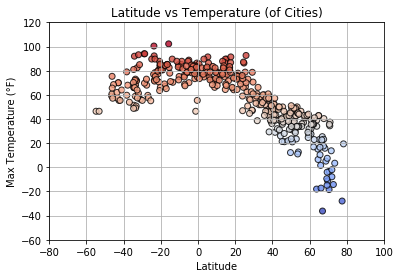

In [45]:
#Latitude vs Temperature

plt.scatter(weather_data_df['Latitude'], 
            weather_data_df['Max Temperature (°F)'], 
            #Set color to temperature data to signify temperature for each city
            c=weather_data_df["Max Temperature (°F)"], 
            edgecolor="black", linewidths=1, marker="o",
            cmap="coolwarm", alpha=0.8, label="City" )

#Set parameters
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-60,120])

#Set Axis Labels and Titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Latitude vs Temperature (of Cities)")

#Save figure
plt.savefig("../WeatherPy/Files/Images/LatvsTemp.png")

#Show the plot
plt.show()

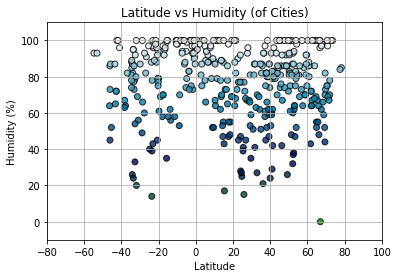

In [59]:
#Humidity and Latitude

plt.scatter(weather_data_df['Latitude'], 
            weather_data_df['Humidity (%)'], 
            #Set color to Humidity data to signify Humidity for each city
            c=weather_data_df["Humidity (%)"], 
            edgecolor="black", linewidths=1, marker="o",
            cmap="ocean", alpha=0.8, label="City" )

#Set parameters
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-10,110])

#Set Axis Labels and Titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (of Cities)")

#Save figure
plt.savefig("../WeatherPy/Files/Images/LatitudevsHumidity.png")

#Show the plot
plt.show()

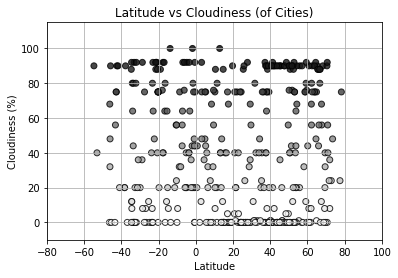

In [63]:
#Cloudiness and Latitude
plt.scatter(weather_data_df['Latitude'], 
            weather_data_df['Cloudiness (%)'], 
            #Set color to Cloudiness data to signify Humidity for each city
            c=weather_data_df["Cloudiness (%)"], 
            edgecolor="black", linewidths=1, marker="o",
            cmap="gist_yarg", alpha=0.8, label="City" )

#Set parameters
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-10,115])

#Set Axis Labels and Titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness (of Cities)")

#Save figure
plt.savefig("../WeatherPy/Files/Images/LatitudevsCloudiness.png")

#Show the plot
plt.show()

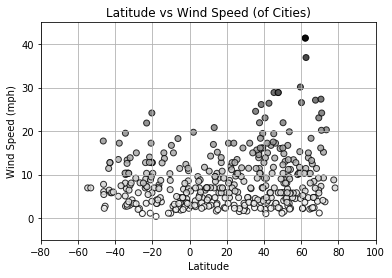

In [66]:
#Wind speed and Latitude
plt.scatter(weather_data_df['Latitude'], 
            weather_data_df['Wind Speed (mph)'], 
            #Set color to Cloudiness data to signify Humidity for each city
            c=weather_data_df["Wind Speed (mph)"], 
            edgecolor="black", linewidths=1, marker="o",
            cmap="gist_yarg", alpha=0.8, label="City" )

#Set parameters
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-5,45])

#Set Axis Labels and Titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (of Cities)")

#Save figure
plt.savefig("../WeatherPy/Files/Images/LatitudevsWind.png")

#Show the plot
plt.show()
